## **1. Evaluation Metrics**
**Metric = Correct things / All things of interest**

In most ML problems where we talk about **precision**, **recall**, and **F1**, we’re focusing on the **positive class** (the “cases” we care about detecting).

That’s because:

* In many real-world problems (fraud detection, disease diagnosis, defect detection…), **positives are rare but important**.
* A false negative (missing a real case) can be costly or dangerous.
* A false positive (flagging something wrongly) also has consequences, but often different ones.


The trick:

* “All things of interest” depends on whether the question is from the **prediction perspective** or the **actual truth perspective**.

---

### **1.1. Precision**

* Q: *"Of all the things I predicted as positive, how many were actually positive?"*
* All predicted positives = **TP + FP** 
* Correct ones among them = **TP**

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

**Perspective:** **Prediction**-oriented.

---

### **1.2. Recall a.k.a. Sensitivity, True Positive Rate TPR**

* Q: *"Of all the things that were actually positive, how many did I find?"*
* All actual positives = **TP + FN**
* Correctly found ones = **TP**

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**Perspective:** **Reality**-oriented.

---

### **1.3. Accuracy**

* Q: *"Of all the predictions I made, how many were correct?"*
* All predictions = **TP + FP + FN + TN**
* Correct = **TP + TN**

$$
\text{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}
$$

**Perspective:** **Global** — considers both classes equally.

---




### **1.4. F1 Score a.k.a. Sørensen-Dice Coefficient**

* Q: *"What's the harmonic mean of precision and recall?"*
  Why harmonic mean? Because it penalizes imbalance between the two.

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$


$$
\text{Dice} = 
\frac{2|A \cap B|}{|A| + |B|} =
\frac{2 \text{TP}}{2 \text{TP} + \text{FP} + \text{FN}}
$$

Notice the **2×TP** in the numerator — this makes Dice more forgiving for small overlaps.

---

**Set Definitions in Terms of TP/FP/FN**

* **TP (True Positive):** predicted object/pixel that matches ground truth
* **FP (False Positive):** predicted object/pixel that does NOT exist in ground truth
* **FN (False Negative):** ground truth object/pixel that was NOT predicted


In **IoU** and **Dice**, we are always talking about **the *positive* class only**.
We ignore negatives (background = **TN (True Negatives)**) entirely. 


---

#### **Relationship to TP, FP, FN**

Let’s write a clean table this time:

| Symbol        | Meaning                                               | Equivalent in Confusion Matrix |
| ------------- | ----------------------------------------------------- | ------------------------------ |
| **\|A\|**     | Size of GT set (all positives)                        | **TP + FN**                    |
| **\|B\|**     | Size of predicted set (all predicted positives)       | **TP + FP**                    |
| **\|A ∩ B\|** | Intersection of GT and prediction (correct positives) | **TP**                         |
| **\|A ∪ B\|** | Union of GT and prediction (combined positives)       | **TP + FP + FN**               |


---
**Connection to Precision & Recall**



$$
\text{Precision} = \frac{TP}{TP + FP}
\qquad
\text{Recall} = \frac{TP}{TP + FN}
$$

**Dice as F1-score:**

$$
\text{Dice} = F_1 = 
\frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

This shows Dice = **harmonic mean of precision and recall**.
IoU does **not** have such a simple harmonic mean interpretation.

---

**Perspective:** Balances **precision** and **recall**. It is a good metric for imbalanced datasets.

- Imbalanced datasets often have far more negative instances than positive ones (e.g., fraud detection with `99%` non-fraud and 1% fraud).

- Accuracy can be misleading in such cases, as a model predicting "negative" for all instances could achieve high accuracy (e.g., `99%`) while failing to detect the positive class.




We use the **F1 score** when we want a **single number** that balances **precision** and **recall**, especially when:

---


**Class imbalance is severe**

When positives are rare:

* Accuracy can be misleading (“predict negative for everyone” still gives high accuracy).
* F1 focuses only on the positive class performance.

---

**Common scenarios**

* **Information retrieval** (search engines, document classifiers) → You want relevant results (**precision**) but also to not miss relevant documents (**recall**).
* **Medical diagnosis** → Missing a disease (**low recall**) and overdiagnosing (**low precision**) are both costly.
* **Fraud detection** → Catching fraud without annoying too many legitimate customers.

---

 **Mental shortcut**:
If you ever catch yourself saying

> “We care about catching positives, but we also care about being correct when we catch them”
> …you’re describing the F1 score use case.

---



### **1.4.1 What is the Harmonic Mean?**

The **harmonic mean (HM)** of a set of positive numbers is:

$$
HM = \frac{\text{number of values}}{\sum\limits_{i=1}^n \frac{1}{x_i}}
$$

It’s essentially the **reciprocal of the arithmetic mean of the reciprocals**.

---

**Intuitive Meaning**: 

* **Use case:** The harmonic mean is ideal when you are averaging **rates** or **ratios** (like speed, density, efficiency), especially when the “thing” you are measuring covers the same **total quantity** (same distance, same work, etc.).
* **Why not arithmetic mean?** Rates don’t add up directly — their reciprocals (like time per unit) are the things that add.
* **Intuition:** If you travel the same distance at two different speeds, your *overall average speed* is **not** the arithmetic mean — it’s the harmonic mean, because the slower part drags down the total more.

Think of it this way:

> Harmonic mean says: "Let’s first figure out how much each rate contributes to the **total time**, and then find the overall rate."

---

**Simple Example — Average Speed**:

**Scenario:**

* First 60 km at **60 km/h**
* Second 60 km at **120 km/h**

**Naïve (wrong) approach — arithmetic mean:**

$$
\frac{60 + 120}{2} = 90 \ \text{km/h}
$$

…but this is **wrong** because you spent *more time* at the slower speed.

---

**Correct — harmonic mean:**

$$
HM = \frac{2}{\frac{1}{60} + \frac{1}{120}}
$$

First, find reciprocals:

$$
\frac{1}{60} = 0.016\overline{6}, \quad \frac{1}{120} = 0.008\overline{3}
$$

Sum:

$$
0.016\overline{6} + 0.008\overline{3} = 0.025
$$

Then:

$$
HM = \frac{2}{0.025} = 80 \ \text{km/h}
$$

---

**Why 80 km/h makes sense**

Let’s check the actual times:

* **60 km at 60 km/h** → 1 hour
* **60 km at 120 km/h** → 0.5 hour
* **Total distance**: 120 km
* **Total time**: 1.5 hours

Average speed:

$$
\frac{120}{1.5} = 80 \ \text{km/h}
$$

Exactly the harmonic mean result.

---

**Key intuition:**
Harmonic mean **weights smaller numbers more heavily** because in rate problems, slow segments take more time and thus have more impact on the average.
If you’re averaging **per-unit rates** (e.g., km/h, items/hour, frames/sec), the harmonic mean is the right tool.

---

### **1.5. IoU (Jaccard)**

**IoU (Intersection over Union)** measures **how much the predicted region overlaps with the ground truth region**, relative to their combined area.

Mathematically:

$$
\text{IoU} = \frac{|A \cap B|}{|A \cup B|}
= \frac{|A \cap B|}{|A| + |B| - |A \cap B|}
$$


Where:

* **Intersection** = Pixels (or area) where prediction and ground truth both agree.
* **Union** = Total area covered by either prediction or ground truth (no double counting).

---




### Examples

**For Bounding Boxes**

Say:

* **GT box**: (x=10, y=10, w=50, h=50) → Area = 50×50 = 2500
* **Pred box**: (x=30, y=30, w=50, h=50) → Area = 50×50 = 2500

Intersection:

* Overlap starts at (30,30) and ends at (60,60) → width=30, height=30 → Intersection area = 900.

Union:

$$
2500 + 2500 - 900 = 4100
$$

IoU:

$$
\text{IoU} = \frac{900}{4100} \approx 0.2195 \; (21.9\%)
$$

---

**For Segmentation Masks (VOC Segmentation)**

Instead of rectangles, we now compare **pixel-wise regions**:

* **Intersection** = Number of pixels where `prediction=1` AND `ground_truth=1`.
* **Union** = Number of pixels where `prediction=1` OR `ground_truth=1`.

This is sometimes called the **Jaccard Index**.

---

#### Example (Mask IoU)

| Pixel Index | GT | Pred | Intersection? |
| ----------- | -- | ---- | ------------- |
| 1           | 1  | 1    | ✅             |
| 2           | 1  | 1    | ✅             |
| 3           | 1  | 0    | ❌             |
| 4           | 0  | 1    | ❌             |
| 5           | 0  | 1    | ❌             |

* **Intersection**: 2 pixels (1&2)
* **Union**: Pixels where either is 1 → (1,2,3,4,5) → 5 pixels

$$
\text{IoU} = \frac{2}{5} = 0.4
$$

---






## **Side-by-Side**

| Metric | Formula | Penalizes | Range | Relationship to Other Metrics |
| :--- | :--- | :--- | :--- | :--- |
| **IoU (Jaccard Index)** | $$\text{IoU} = \frac{TP}{TP + FP + FN}$$ | False Positives and False Negatives equally | 0 to 1 | IoU is a stricter metric than the Dice coefficient |
| **Dice Coefficient (F1 Score)** | $$\text{Dice} = \frac{2TP}{2TP + FP + FN}$$ | False Positives and False Negatives equally | 0 to 1 | Dice $= \frac{2 \cdot IoU}{1 + IoU}$ |

---




#### **Numerical Example**

Say we have:

* **TP = 80**, **FP = 20**, **FN = 40**

### IoU:

$$
\text{IoU} = \frac{80}{80+20+40} = \frac{80}{140} = 0.571
$$

### Dice:

$$
\text{Dice} = \frac{2 \cdot 80}{2\cdot 80 + 20 + 40}
= \frac{160}{160+60}
= 0.727
$$

So Dice is **always higher** than IoU for the same counts, unless perfect overlap (where both = 1).

---




### **1.3. Fall-out or False Alarm Rate, False Positive Rate (FPR)**

**FPR = Of all the *actual negatives*, how many did I wrongly call positive?**

Mathematically:

$$
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$

* Denominator = all **actual negatives** = FP + TN
* Numerator = the ones you **mislabeled as positive** = FP

---

**The intuition**

Think of FPR as the **"false alarm rate"**:

* You’re the smoke detector.
* The “negatives” are times there’s *no fire*.
* FPR tells you how often you falsely scream “fire!” when it’s just burnt toast.

---

**Relationship to other metrics**

* FPR = 1 − **Specificity** (a.k.a. True Negative Rate)

  $$
  \text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
  $$
* In **ROC curves**, the **x-axis** is **FPR** and the **y-axis** is **TPR** (Recall).

---

**Quick way to recall FPR without memorizing**

Same trick as with Precision/Recall:

1. Decide **whose perspective**:

   * FPR cares about **actual negatives**.
2. Denominator = all actual negatives (FP + TN).
3. Numerator = the subset that was wrong (FP).

---


### **1.5. mAP**

**Mean Average Precision** (mAP) is a widely used metric in object detection. It summarizes a model's performance by averaging the **Average Precision (AP)** scores across all classes. It balances precision (how accurate the positive predictions are) and recall (how many true positives are correctly identified).

- **AP** is computed as the area under the **Precision-Recall curve** (a plot of precision vs. recall at different confidence thresholds). 
- Alternatively, **AP** can be approximated by averaging precision values at different recall levels (e.g., using 11-point interpolation or all points).

- **Mean Average Precision (mAP)**: is the mean of AP scores across all classes. For example, in object detection with 3 classes, if the AP scores are 0.8, 0.7, and 0.9, then:   `mAP = (0.8 + 0.7 + 0.9) / 3 = 0.8`

### mAP in Object Detection
In object detection (e.g., models like YOLO, Faster R-CNN), mAP is commonly used with specific conventions:
- **Intersection over Union (IoU)**: A threshold (e.g., IoU ≥ 0.5) determines whether a predicted bounding box is a true positive (correctly matches a ground-truth object).
- **mAP@IoU**: The mAP score is calculated at a specific IoU threshold. For example:

### Example 

For a given class, collect **all predictions across the dataset** and **sort them by confidence (desc)**.

| Prediction | Confidence | Computed IoU | TP/FP |
| ---------- | ---------- | ------------ | ----- |
| P1         | 0.95       | 0.85         | ✅ TP  |
| P2         | 0.90       | 0.85         | ✅ TP  |
| P3         | 0.80       | 0.00         | ❌ FP  |
| P4         | 0.70       | 0.85         | ✅ TP  |
| P5         | 0.60       | 0.00         | ❌ FP  |


<img src="images/predictions_ground_truths_mAP.png" width="40%">



Here’s the mAP for your table (single class, IoU ≥ 0.5, predictions sorted by confidence).

**Data**

P1 ✅, P2 ✅, P3 ❌, P4 ✅, P5 ❌
GT boxes = 3

**Cumulative metrics**

| Step | TP | FP | Precision TP/(TP+FP) | Recall TP/(3=TP+FN) |
| ---- | -: | -: | -------------------: | ----------: |
| P1   |  1 |  0 |                 1.00 | 1/3 ≈ 0.333 |
| P2   |  2 |  0 |                 1.00 | 2/3 ≈ 0.667 |
| P3   |  2 |  1 |                0.667 |       0.667 |
| P4   |  3 |  1 |                 0.75 |         1.0 |
| P5   |  3 |  2 |                 0.60 |         1.0 |


**Average Precision (area under PR)**

<img src="images/precision_recall.png" width="40%">




AP = (1/3)\*1.00 + (1/3)\*1.00 + (1/3)\*0.75
\= 1/3 + 1/3 + 1/4
\= **11/12 ≈ 0.9167**

Since there’s just one class, **mAP\@0.5 = AP ≈ 0.9167**.





**Mental “role-play” trick to avoid mixing them**

* **Precision**: *“When I shout ‘Positive!’, how often am I right?”* (Imagine a police officer pointing at suspects)
* **Recall**: *“Of all the real criminals, how many did I catch?”* (Same police officer but now thinking of the ones still free)
* **Accuracy**: *“How often did I get the right answer overall?”*
* **F1**: *“How good am I at both catching criminals and not accusing innocents?”*
* **Confidence** → orders predictions (drives the PR sweep).
* **IoU (with τ)** → decides **TP vs FP** during that sweep.
* **AP** → **area** under the resulting PR curve (no single confidence threshold needed).

*(Side note: NMS also uses an IoU-like threshold, but that’s a **preprocessing** step to reduce duplicate boxes and is **separate** from evaluation IoU τ.)*

---


If you blank out in an exam or interview:

1. Draw the 2×2 confusion matrix.
2. Identify whether the metric is **prediction-oriented** (denominator uses predicted column) or **truth-oriented** (denominator uses actual row) or **global** (all cells).
3. Pick numerator = “correct” subset from that denominator.
4. For F1, combine Precision & Recall with harmonic mean.

---
### **1.5. Best Practices for Evaluation**

- Use **validation loss** during training to monitor overfitting.
- Use a **confusion matrix** to understand misclassification patterns.
- Use **cross-validation** for robust evaluation.

---
**Accuracy vs Precision**


<table>
  <tr>
    <td align="center" width="50%">
      <img src="images/high_accuracy_low_precision.svg" width="40%" />
      <br><strong>High Accuracy<br>Low Precision</strong>
      <br>Average near target
      <br>Points widely scattered
    </td>
    <td align="center" width="50%">
      <img src="images/high_precision_high_accuracy.svg" width="40%" />
      <br><strong>High Precision<br>High Accuracy</strong>
      <br>Average on target
      <br>Tight clustering
    </td>
  </tr>
  <tr>
    <td align="center">
      <img src="images/high_precision_low_accuracy.svg" width="40%" />
      <br><strong>High Precision<br>Low Accuracy</strong>
      <br>Tight clustering
      <br>Average off target
    </td>
    <td align="center">
      <img src="images/low_precision_low_accuracy.svg" width="40%" />
      <br><strong>Low Precision<br>Low Accuracy</strong>
      <br>Wide scattering
      <br>Average off target
    </td>
  </tr>
</table>


## **2. Model Diagnostics and Evaluation Techniques**

The methods helping you **understand *why*** your model performs the way it does (e.g., underfitting, overfitting, good generalization). 

---


###  2.1. **Learning Curves**

- **Definition**: Plot of **training and validation loss/accuracy** vs. number of training iterations (or dataset size).
- **Used for**:
  - Identifying **underfitting** (both losses high, converge poorly)
  - Identifying **overfitting** (training loss ↓ but validation loss ↑)
  - Seeing if more data might help

>  Useful across *all* deep learning tasks.

---

###  2.2. **Validation Curves**

- **Definition**: Performance vs. **hyperparameter value** (e.g., regularization strength, tree depth).
- Helps you tune hyperparameters by visualizing:
  - **Training error** vs. **Validation error**
  - Used to spot high bias (both errors high) vs. high variance (gap between training and validation)

---

###  2.3. **Cross Validation (CV)**

- **K-Fold Cross Validation**: Partition data into K subsets and average the result.
- **Use**:
  - Estimate **model generalization** more reliably
  - Compare model configurations
- **Training Error vs. Cross-Validation Error** is a powerful way to diagnose:

| Case | Training Error | CV Error | Diagnosis         |
|------|----------------|----------|-------------------|
| High | High           | High     | Underfitting      |
| Low  | High           | Overfitting      |
| Low  | Low            | Good Fit         |

---

### 2.4. **Top-K Accuracy / Error Rate**

- **Top-K Accuracy**: Model prediction is correct if the true label is in the top **K** predicted probabilities.
  - **Top-1 Accuracy**: Same as normal accuracy
  - **Top-5 Accuracy**: Common in ImageNet, etc.
- **Top-K Error Rate** = `1 - Top-K Accuracy`

>  Crucial in **multi-class classification with many classes**.

---

**Top-K Accuracy Example**


Let's assume you're using a neural network to implement a machine learning algorithm for object recognition. A image of a cat is shown, and these are the neural network outputs:

- Tiger: 0.4
- Dog: 0.3
- Cat: 0.1
- Lynx: 0.09
- Lion: 0.08
- Bird: 0.02
- Bear: 0.01

You will count this performance as incorrect, using **top-1 accuracy**, since it predicted a tiger.

You count this production as accurate using **top-5 accuracy**, since the cat is among the top-5 guesses.


##  3. **Confusion Matrix**

There’s **no universal law** that says “rows = actual” and “columns = predicted.”
It’s a **convention**, but one that’s common enough that you’ll see it in most textbooks and ML libraries.

---

**The most common convention**

```
                Predicted Positive   Predicted Negative
Actual Positive       TP                  FN
Actual Negative       FP                  TN
```

* **Rows** = **actual / ground truth**
* **Columns** = **predictions**

---

**How to tell if someone’s flipped it**

Authors and libraries sometimes swap it:

```
                Actual Positive    Actual Negative
Predicted Positive       TP            FP
Predicted Negative       FN            TN
```

---

If you work across **scikit-learn**, **TensorFlow**, and papers from medicine or NLP, you’ll see both orientations, so **Never assume** rows = actual.


---

### 3.1. Understanding Confusion Matrix in Binary Classification (Cats vs Non-Cats)

Let's consider a **binary classifier** trained to distinguish between **cats** and **non-cats**. You have a test dataset of **1100 images**, containing:

- **100 images of cats** (positive class)
- **1000 images of non-cats** (negative class)

The classifier outputs either:
- **Positive** → predicts the image is a **cat**
- **Negative** → predicts the image is a **non-cat**

**What Do True/False and Positive/Negative Mean?**

- **Positive / Negative** refer to the **label assigned by the classifier**.
- **True / False** indicate **whether the prediction matches the actual data**:
  - **True** = the prediction is correct
  - **False** = the prediction is incorrect

This leads us to the **Confusion Matrix**, which summarizes the outcomes:

---

**True Positive (TP) — Hit**
- The image **is a cat**, and the classifier **correctly predicts cat**.
- **Count:** 90 cat images correctly labeled as cats.

---

**True Negative (TN) — Correct Rejection**
- The image **is not a cat**, and the classifier **correctly predicts non-cat**.
- **Count:** 940 non-cat images correctly labeled as non-cats.

---

**False Positive (FP) — False Alarm / Type I Error**
- The image **is not a cat**, but the classifier **incorrectly predicts cat**.
- **Count:** 60 non-cat images wrongly labeled as cats.

---

**False Negative (FN) — Miss / Type II Error**
- The image **is a cat**, but the classifier **incorrectly predicts non-cat**.
- **Count:** 10 cat images wrongly labeled as non-cats.

---

### Summary of Ground Truth Counts

- **Positive cases (actual cats):**  
  $P = TP + FN = 90 + 10 = 100 $

- **Negative cases (actual non-cats):**  
  $N = TN + FP = 940 + 60 = 1000 $




---

### 3.2. Multi-Class Confusion Matrix

In a **multi-class classification** problem, each instance belongs to **one of multiple classes** (e.g., $c_0$ to $c_4$). For each class, we can construct a **confusion matrix** to evaluate performance specifically for that class.

Let’s analyze the confusion matrix from the **perspective of class $c_2$**.

---

**Confusion Matrix (One-vs-All View for Class $c_2$)**

| <div style="text-align:right;">Predicted<br>class →<br>Actual class ↓</div> | $c_0$ | $c_1$ | $c_2$ | $c_3$ | $c_4$ |
|------------------------------------------|-------|-------|-------|-------|-------|
| **$c_0$**                                 | TN    | TN    | **FP** | TN    | TN    |
| **$c_1$**                                 | TN    | TN    | **FP** | TN    | TN    |
| **$c_2$**                                 | **FN** | **FN** | **TP** | **FN** | **FN** |
| **$c_3$**                                 | TN    | TN    | **FP** | TN    | TN    |
| **$c_4$**                                 | TN    | TN    | **FP** | TN    | TN    |

Here, we are treating class $c_2$ as the **positive class** and all other classes as **negative** (one-vs-all).  
Each entry is labeled according to the **impact it has on class $c_2$'s prediction**.

---

**Confusion Metrics for Class $c_i$**

For a given class $c_i$, the confusion matrix elements are computed as:

- **True Positive (TP)**:  
  $
  TP_i = c_{ii}
  $  
  The number of times class $c_i$ was correctly predicted.

- **False Positive (FP)**:  
  $
  FP_i = \sum_{l=1}^{n} c_{li} - TP_i
  $  
  The number of times other classes were incorrectly predicted as $c_i$.

- **False Negative (FN)**:  
  $
  FN_i = \sum_{l=1}^{n} c_{il} - TP_i
  $  
  The number of times class $c_i$ was incorrectly predicted as other classes.

- **True Negative (TN)**:  
  $
  TN_i = \sum_{l=1}^{n} \sum_{k=1}^{n} c_{lk} - TP_i - FP_i - FN_i
  $  
  The number of correct predictions for all classes other than $c_i$.

---



## **4. Bias-Variance Tradeoff**
The **bias–variance tradeoff** is directly related to **overfitting** and **underfitting**.



<table>
  <tr>
    <td align="center" width="50%">
      <img src="images/high_bias_low_variance.png" width="40%" />
      <br><strong>High bias, <br>low variance</strong>
    </td>
    <td align="center" width="50%">
      <img src="images/high_bias_high_variance.png" width="40%" />
      <br><strong>High bias, <br> high variance</strong>
    </td>
  </tr>
  <tr>
    <td align="center">
      <img src="images/low_bias_low_variance.png" width="40%" />
      <br><strong>Low bias, <br>low variance</strong>
    </td>
    <td align="center">
      <img src="images/low_bias_high_variance.png" width="40%" />
      <br><strong>Low bias, <br>high variance</strong>
    </td>
  </tr>
</table>




---

### What is **Bias**?

* **Definition**: Error caused by *wrong assumptions* in the learning algorithm.
* Think of it as **how far the model’s average prediction is from the truth**.
* **High bias** → model is too *simplistic*, can’t capture the complexity of the data.
* Example: Trying to fit a straight line to data that is clearly quadratic.

---

### What is **Variance**?

* **Definition**: Error caused by the model’s *sensitivity to small fluctuations in the training data*.
* Think of it as **how much the model’s predictions change if you train it on different samples**.
* **High variance** → model fits the training data too closely, including noise.
* Example: A high-degree polynomial curve that passes exactly through every training point.

---

###  Bias–Variance **Tradeoff**

* If you **increase model complexity**:

  * Bias decreases (model fits the training data better)
  * Variance increases (model becomes sensitive to noise → overfitting)
* If you **decrease model complexity**:

  * Bias increases (model can’t capture complexity → underfitting)
  * Variance decreases (predictions are more stable, but possibly wrong)

---

###  Relation to **Overfitting** & **Underfitting**

| Case             | Bias         | Variance     | Result                                                                                           |
| ---------------- | ------------ | ------------ | ------------------------------------------------------------------------------------------------ |
| **Underfitting** | High         | Low          | Model is too simple, misses patterns (high training error & high test error)                     |
| **Overfitting**  | Low          | High         | Model memorizes training data, performs poorly on new data (low training error, high test error) |
| **Just right**   | Low–Moderate | Low–Moderate | Good generalization to unseen data                                                               |

---

**In short:**

* **Bias** → systematic error from simplifying assumptions.
* **Variance** → sensitivity to training data noise.
* **Tradeoff** → balancing them is key to avoiding underfitting and overfitting.

---



### **Numerical Example Bias–Variance Tradeoff**

Assume the **true function** is a quadratic curve:

$$
y = x^2 + \epsilon
$$

where $\epsilon$ is small random noise (say, $\epsilon \sim \mathcal{N}(0, 1)$).

---

We’ll fit three models to noisy samples of this function:

1. **Underfitting model** – **Linear regression** (too simple → high bias, low variance)
2. **Good model** – **Quadratic regression** (right complexity → low bias, low variance)
3. **Overfitting model** – **10th-degree polynomial** (too complex → low bias, high variance)

---

**How we measure bias & variance**: 

If we train each model many times on **different random datasets** from the same true function:

* **Bias** (squared):

  $$
  \text{Bias}^2 = \left( \mathbb{E}[\hat{f}(x)] - f(x) \right)^2
  $$

  → Difference between the *average prediction* and the *true function*.

* **Variance**:

  $$
  \text{Variance} = \mathbb{E}\left[ (\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2 \right]
  $$

  → How much the prediction changes across datasets.

* **Total Error** (MSE decomposition):

  $$
  \text{MSE} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Noise}
  $$

---

### **Intuition Without Numbers**

If we try $x = 2$:

| Model           | Avg Prediction | True $y=4$ | **Bias²** | **Variance** | **MSE** (no noise) |
| --------------- | -------------- | ---------- | --------- | ------------ | ------------------ |
| **Linear**      | 2.1            | 4.0        | 3.61      | 0.1          | 3.71               |
| **Quadratic**   | 4.0            | 4.0        | 0.00      | 0.2          | 0.20               |
| **Poly deg 10** | 4.0            | 4.0        | 0.00      | 5.0          | 5.00               |

**Interpretation:**

* **Linear**: Large bias (far from truth), very stable (low variance) → **underfit**.
* **Quadratic**: Small bias, small variance → **good fit**.
* **High-degree polynomial**: Small bias (fits mean well) but huge variance → predictions swing wildly depending on training data → **overfit**.

---


## **4. Receiver Operating Characteristic (ROC)**

Here we have a classifier which classifies "obese" (positive) vs. "not obese" (negative) base on the weight, with multiple cut-off values (`0.1`, `0.39`, `0.97`, …).


### **4.1. The setup**

* **Positive class:** Obese
* **Negative class:** Not obese
* **Classifier output:** Some score between `0` and `1` that represents how “obese” the person is predicted to be.
* **Cut-off value (threshold):** The point above which we say “Yes, obese” and below which we say “No, not obese.”

Example:

* Threshold = `0.1` → Many people will be predicted as obese (high sensitivity, low specificity).
* Threshold = `0.97` → Only the highest-scoring people will be called obese (low sensitivity, high specificity).

---

### **4.2. What the ROC curve is**

The **ROC curve** is simply:

> “What happens to the True Positive Rate and False Positive Rate as I change the threshold?”

**Axes:**

* **X-axis:** FPR (False Positive Rate) = FP / (FP + TN)
* **Y-axis:** TPR (True Positive Rate) = TP / (TP + FN)

**How we plot it:**

1. Pick a threshold (e.g., 0.1)
2. Calculate TPR and FPR at that threshold
3. Repeat for many thresholds (0 → 1)
4. Connect the points — that’s your ROC curve

---

### **4.3. Interpreting the ROC**

* **Top-left corner (0, 1):** Perfect classifier — 100% TPR, 0% FPR
* **Diagonal line:** Random guessing
* **Closer to top-left = better model**

For our **obesity example**:

* At threshold = `0.1` → You’ll detect nearly all obese people (high TPR) but misclassify many non-obese as obese (high FPR)
* At threshold = `0.97` → You’ll rarely call anyone obese (low FPR) but also miss many actual obese people (low TPR)
* The ROC curve shows this tradeoff across **all** possible thresholds

---




<img src='images/obese_classifier.svg'>


We have to set a cut off value which below that the output of the classifier will be considerd **not obese** and above that obese. We can set different values and based on that we can calculate $TP, TN, FP, FN$.

For instance if we set very low we would have:

Classifier Cut Off Value is :0.1

$TP=4,FP=2,TN=2,FN=0, TPR=1.0, FPR=0.5$

<img src='images/classifier_cut_off_value_0.1.svg'/>


Classifier Cut Off Value is :0.39

$TP=3,FP=2,TN=2,FN=1, TPR=0.75, FPR=0.5$

<img src='images/0.3913123398875481.svg'/>



Classifier Cut Off Value is :0.97

$TP=3,FP=0,TN=4,FN=1,TPR=0.75,FPR=0.0$
<img src='images/0.9681187290638695.svg'/>

**ROC** curve is plotting <strong>TPR</strong> against <strong>FPR</strong> for various cut-off threshold values. 

ROC curve is a popular curve to look at overall model performance and pick a good cut-off threshold for the model.


<img src='images/ROC.svg' />

We can see that the cut off threshold at 0.97 is better than 0.39 since they have the same **true positive rate** but the one at  0.97 has less **false positive rate**.

Depending on how many false positive we would like to accept, 0.97 or 0.1  would be the ideal cut off threshold.

## **5. Area Under the Curve (AUC)**
Here we have used another classifier and we can see the area under curve in our first classifier is bigger, suggesting our first classifier is better.
<img src='images/second_ROC.svg' />

Refs: [1](https://www.youtube.com/watch?v=4jRBRDbJemM&t=2s)


### **5.1. What AUC means**

The **Area Under the ROC Curve (AUC)** is:

> The probability that a randomly chosen obese person will get a higher score than a randomly chosen non-obese person.

**Interpretation:**

* **AUC = 1.0:** Perfect separation
* **AUC = 0.5:** No better than random
* **AUC < 0.5:** Worse than random (you could flip the prediction to make it better)

---

### **5.2 In our cut-off example**

Imagine you run the classifier on the dataset:

| Threshold | TP | FP | TN | FN | TPR  | FPR  |
| --------- | -- | -- | -- | -- | ---- | ---- |
| 0.10      | 95 | 40 | 60 | 5  | 0.95 | 0.40 |
| 0.39      | 85 | 15 | 85 | 15 | 0.85 | 0.15 |
| 0.97      | 40 | 2  | 98 | 60 | 0.40 | 0.02 |

Plotting (FPR, TPR) for these gives you three points on the ROC curve. The rest of the curve comes from checking **all** thresholds between 0 and 1.

---









* **AUC (Area Under Curve)** is the **integral** of the ROC curve from FPR = 0 to FPR = 1.
* Since ROC is discrete points from your data, we approximate the integral numerically (usually **trapezoidal rule**).

---


**Example calculation**

Say your ROC points are:

```
FPR   TPR
0.00  0.00
0.10  0.70
0.20  0.85
0.40  0.90
1.00  1.00
```

**Step-by-step:**

* Between FPR 0.00 → 0.10:

  * Width = 0.10 - 0.00 = 0.10
  * Avg height = (0.00 + 0.70) / 2 = 0.35
  * Area = 0.10 × 0.35 = 0.035
* Between FPR 0.10 → 0.20:

  * Width = 0.10
  * Avg height = (0.70 + 0.85) / 2 = 0.775
  * Area = 0.0775
* Between FPR 0.20 → 0.40:

  * Width = 0.20
  * Avg height = (0.85 + 0.90) / 2 = 0.875
  * Area = 0.175
* Between FPR 0.40 → 1.00:

  * Width = 0.60
  * Avg height = (0.90 + 1.00) / 2 = 0.95
  * Area = 0.57

**Total AUC**:

$$
0.035 + 0.0775 + 0.175 + 0.57 = 0.8575
$$

---

### **5.3. Comparing two classifiers**

* The classifier with **larger AUC** has, on average, a better ability to rank positive cases higher than negative cases.
* In your `second_ROC.svg`, the one with the **curve consistently closer to the top-left** will have the higher AUC.

---


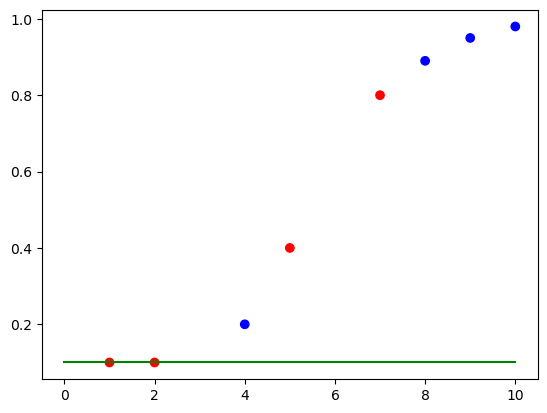

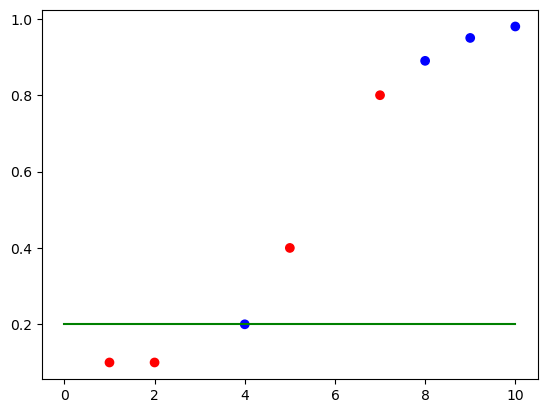

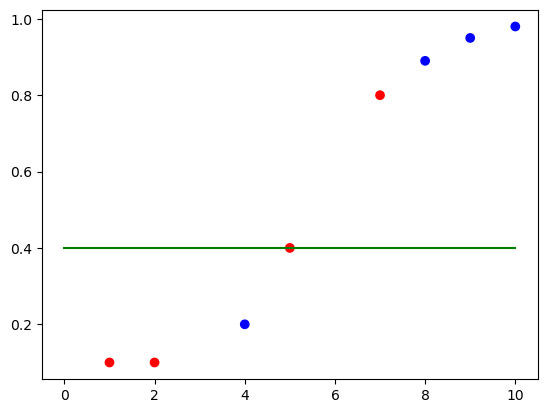

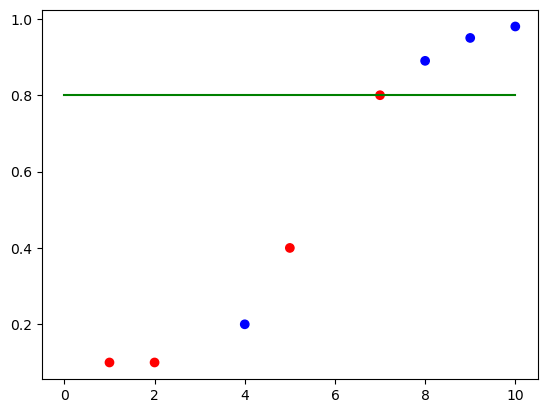

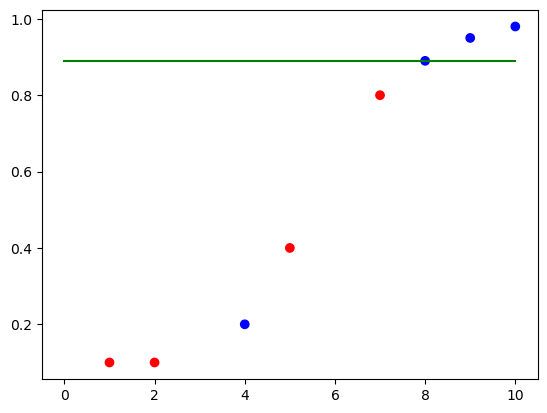

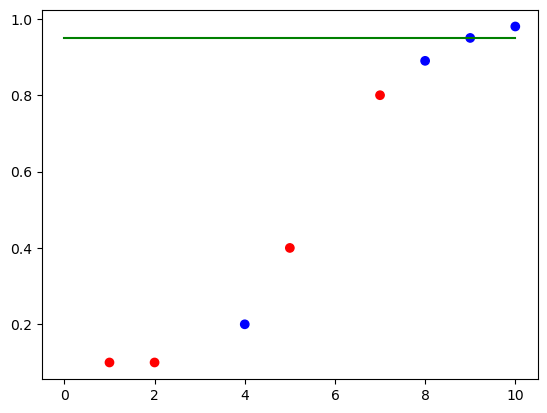

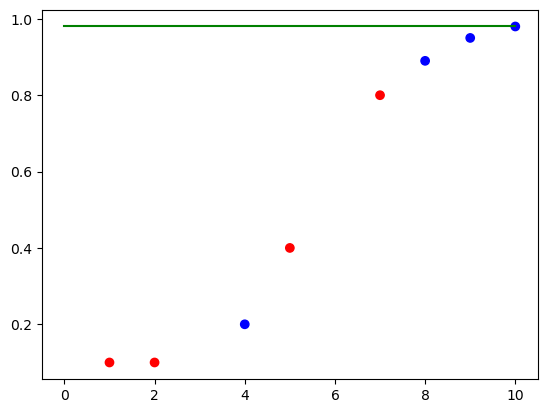

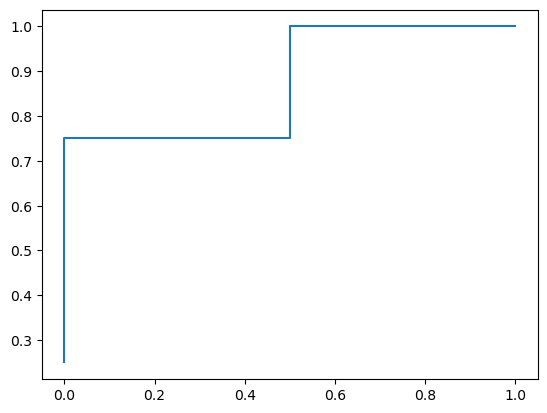

true positive rates: [0.   0.25 0.75 0.75 1.   1.  ]
false positive rates: [0.  0.  0.  0.5 0.5 1. ]
thresholds: [ inf 0.98 0.89 0.4  0.2  0.1 ]
true positive rates: [np.float64(1.0), np.float64(1.0), np.float64(0.75), np.float64(0.75), np.float64(0.75), np.float64(0.5), np.float64(0.25)]
false positive rates: [np.float64(1.0), np.float64(0.5), np.float64(0.5), np.float64(0.25), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
thresholds: [0.1  0.2  0.4  0.8  0.89 0.95 0.98]
F1_scores: [np.float64(0.6666666666666666), np.float64(0.8), np.float64(0.6666666666666665), np.float64(0.75), np.float64(0.8571428571428571), np.float64(0.6666666666666666), np.float64(0.4)]
Accuracy Score : 0.875
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.

In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

import matplotlib.pyplot as plt

weights = [1,2,4,5,7,8,9,10]
actual_labels = [0,0,1,0,0,1,1,1]

prediction_values=[0.1,0.1, 0.2,0.4,0.8,0.89,0.95,0.98  ]

#get_color=lambda x:'blue' if x==1 else 'red'

color_dict={1:'blue', 0:'red'}
get_color=lambda x:  color_dict[x]
get_prediction_labels=lambda prediction_values, cut_off:  1 if (prediction_values>=cut_off)  else 0


true_positive_rates=[]
false_positive_rates=[]
F1_scores=[]



for cut_off in np.unique(prediction_values):

	data_confusion_matrix=confusion_matrix(actual_labels , [ get_prediction_labels(prediction_value,cut_off)  for prediction_value in prediction_values   ]   )

	#print(data_confusion_matrix)

	tn, fp, fn, tp =data_confusion_matrix.ravel()
	true_positive_rate=tp/(tp+fn)
	false_positive_rate=1-tn/(tn+fp)

	false_positive_rates.append(false_positive_rate)
	true_positive_rates.append(true_positive_rate)
	#print("cut_off:",cut_off)
	#print("true_positive_rate:",true_positive_rate)
	#print("false_positive_rate:",false_positive_rate)
	#print("tn={} fp={} fn={} tp={}".format(tn, fp, fn, tp))
	colors=[get_color(x) for x in actual_labels ]


	precision=tp/(tp+fp)
	recall=tp/(tp+fn)
	F1_score= 2*precision*recall/(precision+recall)
	F1_scores.append(F1_score)

	plt.scatter(weights,prediction_values,color=colors   )
	plt.plot([0,10], [cut_off,cut_off],color='green')
	plt.show()

	
plt.plot(false_positive_rates,true_positive_rates)
plt.show()




import numpy as np
from sklearn import metrics


fpr, tpr, thresholds = metrics.roc_curve(actual_labels, prediction_values, pos_label=None)

print("true positive rates:",tpr)
print("false positive rates:",fpr)
print("thresholds:",thresholds)


#print("true positive rates:",true_positive_rates[::-1])
print("true positive rates:",true_positive_rates)
print("false positive rates:",false_positive_rates)
print("thresholds:",np.unique(prediction_values) )
print("F1_scores:",F1_scores)



cut_off=0.89
print ('Accuracy Score :',accuracy_score(actual_labels, [ get_prediction_labels(prediction_value,cut_off)  for prediction_value in prediction_values   ]) )

print (classification_report(actual_labels, [ get_prediction_labels(prediction_value,cut_off)  for prediction_value in prediction_values   ]) )


## **6. Useful Metric in Deep Learning Projects**


### **Image classification (balanced classes)**

* **Typical metric**: **Accuracy** (and sometimes Top-K accuracy).
* Why: All classes are equally important, and you have lots of samples per class.
* Example: CIFAR-10, ImageNet classification.

---

### **Image classification (imbalanced classes / rare positives)**

* **Typical metric**: **Precision, Recall, F1**, and possibly **ROC-AUC**.
* Why: You don’t want a model that just predicts the majority class.
* Example: Defect detection in manufacturing, disease detection in MRI scans.

---

### **Object detection**

* **Typical metric**: **mAP** (mean Average Precision), which is actually a *precision–recall curve* metric.
* Why: You care both about localizing objects and classifying them correctly.
* Example: YOLO, Faster R-CNN, Detectron2.

---

### **Segmentation**

* **Typical metric**: **IoU** (Intersection over Union) or **Dice coefficient** (same as F1 at the pixel level).
* Why: You care about overlap between predicted and actual regions, not just pixel-by-pixel accuracy.
* Example: Medical image segmentation, road/lane detection.

---

## **Ranking / retrieval**

* **Typical metric**: **Precision\@K, Recall\@K, mAP, NDCG**.
* Why: You want relevant results to appear high in the list.
* Example: Search engines, recommender systems.

---

## **Binary classification in risk-sensitive domains**

* **Typical metric**: **Precision, Recall, F1, ROC-AUC**, and sometimes **PR-AUC**.
* Why: You often care more about positives (fraud, cancer, spam) than negatives.
* Example: Fraud detection, spam filtering, medical diagnosis.

---

💡 **Rule of thumb for deep learning**:

* **Balanced dataset + all classes equally important** → Accuracy (maybe Top-K).
* **Rare positives + important to catch them** → Recall, F1, PR-AUC.
* **False alarms are costly** → Precision, ROC-AUC.
* **Both catching positives and avoiding false alarms matter** → F1 score.
* **Spatial predictions** (boxes, masks) → IoU, mAP, Dice.

---




## **7. Deep Learning Metric Decision Tree**

```
START
 |
 |-- Q1: Is your task multi-class or multi-label?
 |      |-- Multi-class (one label per sample) --> Go to Q2
 |      |-- Multi-label (multiple labels per sample) --> Use Precision, Recall, F1 (micro/macro), or mAP
 |
 |-- Q2: Are all classes equally important?
 |      |-- YES --> Use Accuracy (and possibly Macro Precision/Recall/F1)
 |      |-- NO --> Go to Q3
 |
 |-- Q3: Is the positive class rare/important?
 |      |-- YES --> Go to Q4
 |      |-- NO --> Accuracy or Weighted Precision/Recall/F1
 |
 |-- Q4: Which matters more for positives?
 |      |-- Catching all positives (minimize false negatives) --> Recall or TPR (Sensitivity)
 |      |-- Being correct when predicting positive (minimize false positives) --> Precision
 |      |-- Both equally --> F1 Score (macro or weighted)
 |
 |-- Q5: Are predictions threshold-based probabilities?
 |      |-- YES --> Also report ROC-AUC or PR-AUC
 |      |-- NO --> Stick to discrete classification metrics
 |
 |-- SPECIAL CASES:
 |      |-- Object detection --> mAP (mean Average Precision), AP@IoU thresholds
 |      |-- Segmentation --> IoU (Jaccard), Dice Coefficient (F1 at pixel level)
 |      |-- Ranking/recommendation --> Precision@K, Recall@K, NDCG, mAP
```

---

### **How to use it**

1. Start at the top and answer each question about your task.
2. At each decision point, the tree leads you to the most suitable metric(s).
3. If you have multiple stakeholders (engineering + business), report **a set** of metrics, but focus on the one matching your business priority.

---

### **Example:**

**Medical image binary classification**

* Multi-class? → **No** (binary)
* Class importance equal? → **No**
* Positive rare? → **Yes**
* Which matters more? → Catching all positives → **Recall**
* Also probability outputs? → **Yes** → Report **ROC-AUC** too.

So: **Recall + ROC-AUC** (and maybe F1 for balance).

---

